# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 1

In [4]:
# Parameters
level = 5


## Train

In [5]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 1000,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 100,
}

In [6]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, level, params)

Training model...
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/5/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5486
[LightGBM] [Info] Number of data points in the train set: 12908, number of used features: 26
[LightGBM] [Info] Start training from score 8.500108
[1]	valid_0's tweedie: 306.542
Training until validation scores don't improve for 100 rounds
[2]	valid_0's tweedie: 301.498
[3]	valid_0's tweedie: 297.227
[4]	valid_0's tweedie: 293.591
[5]	valid_0's tweedie: 290.542
[6]	valid_0's tweedie: 288.002
[7]	valid_0's tweedie: 285.864
[8]	valid_0's tweedie: 284.096
[9]	valid_0's tweedie: 282.626
[10]	valid_0's tweedie: 281.434
[11]	valid_0's tweedie: 280.454
[12]	valid_0's tweedie: 279.606
[13]	valid_0's tweedie: 278.938
[14]	valid_0's tweedie: 278.408
[15]	valid_0's tweedie

/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[177]	valid_0's tweedie: 275.848
[178]	valid_0's tweedie: 275.848
[179]	valid_0's tweedie: 275.848
[180]	valid_0's tweedie: 275.848
[181]	valid_0's tweedie: 275.848
[182]	valid_0's tweedie: 275.848
[183]	valid_0's tweedie: 275.848
[184]	valid_0's tweedie: 275.849
[185]	valid_0's tweedie: 275.849
[186]	valid_0's tweedie: 275.849
[187]	valid_0's tweedie: 275.848
[188]	valid_0's tweedie: 275.848
[189]	valid_0's tweedie: 275.848
[190]	valid_0's tweedie: 275.848
[191]	valid_0's tweedie: 275.849
[192]	valid_0's tweedie: 275.849
[193]	valid_0's tweedie: 275.849
[194]	valid_0's tweedie: 275.849
[195]	valid_0's tweedie: 275.848
[196]	valid_0's tweedie: 275.847
[197]	valid_0's tweedie: 275.847
[198]	valid_0's tweedie: 275.847
[199]	valid_0's tweedie: 275.847
[200]	valid_0's tweedie: 275.847
[201]	valid_0's tweedie: 275.847
[202]	valid_0's tweedie: 275.847
[203]	valid_0's tweedie: 275.849
[204]	valid_0's tweedie: 275.849
[205]	valid_0's tweedie: 275.849
[206]	valid_0's tweedie: 275.85
[207]	valid

## Predict

In [7]:
fcst = predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level)
fcst

,dept_id,d,sales,fcst
13195,0,1886,2261,2416.235116
13202,0,1887,2262,2462.182937
13209,0,1888,2282,2566.205638
13216,0,1889,2493,2786.193393
13223,0,1890,3403,3625.947864
...,...,...,...,...
13362,6,1909,1846,1715.757826
13369,6,1910,1783,1659.022907
13376,6,1911,1966,2230.518118
13383,6,1912,2703,2593.869831


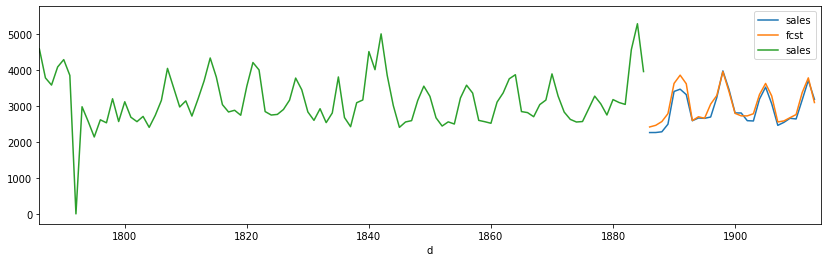

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level)

## Evaluate

In [9]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

,dept_id,mse_fcst,mse_naive_insample,weights,msse,rmsse,wrmsse
0,0,31349.751176,2.230839e+05,0.066794,0.140529,0.374872,0.025039
1,1,234176.609382,5.305284e+05,0.155681,0.441403,0.664381,0.103431
2,2,628490.243109,9.276180e+06,0.347227,0.067753,0.260294,0.090381
3,3,62834.350387,3.083983e+05,0.122793,0.203744,0.451380,0.055426
4,4,1833.636125,3.751819e+03,0.005876,0.488733,0.699094,0.004108
5,5,303740.976345,1.454931e+06,0.229201,0.208767,0.456910,0.104724
6,6,17601.227015,9.454361e+04,0.072428,0.186170,0.431475,0.031251


In [10]:
accuracy_df["weights"].sum()

1.0000001

In [11]:
accuracy_df["wrmsse"].sum()

0.4143611340034676

## Misc